# Практическая работа №2
## по предмету "Системы искусственного интеллекта"

Целью практической работы является изучение моделей машинного обучения для задачи регрессии.

Выполните предварительную обработку и анализ набора данных.

Затем вам необходимо выбрать 3 модели машинного обучения, которые могут решать задачу регрессии, и обучить их на основе данного набора данных. Обязательным условием является построение графика изменения loss для каждой из выбранных моделей. В результате выполнения работы необходимо сделать вывод, какая из моделей лучше подошла для решения поставленной задачи.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Datasets/AISP2.csv')
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [4]:
df.processor_gnrtn.value_counts()

processor_gnrtn
11th             334
Not Available    225
10th             204
8th               41
7th                9
9th                6
12th               3
4th                1
Name: count, dtype: int64

In [5]:
df.loc[df.processor_gnrtn == 'Not Available', 'processor_gnrtn'] = np.nan

In [6]:
df = df.fillna(df.mode().iloc[0])

In [7]:
from DataFrameOperations import *

In [8]:
full_df: pd.DataFrame = kill_0GB(df, ['ssd', 'hdd', 'graphic_card_gb'])
full_df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,512 GB,1024 GB,Windows,64-bit,4 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,512 GB,1024 GB,Windows,64-bit,4 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,512 GB,1024 GB,Windows,64-bit,4 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,1024 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,11th,4 GB,DDR4,512 GB,512 GB,Windows,64-bit,4 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,11th,4 GB,DDR4,1024 GB,1024 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,11th,4 GB,DDR4,1024 GB,1024 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,11th,4 GB,DDR4,1024 GB,1024 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,11th,4 GB,DDR4,1024 GB,1024 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [11]:
full_df_final: pd.DataFrame = made_all_to_categorical(full_df)

In [12]:
full_df_final.graphic_card_gb.value_counts()

graphic_card_gb
1.0    705
0.0     67
2.0     37
3.0     14
Name: count, dtype: int64

<Axes: xlabel='Price', ylabel='Count'>

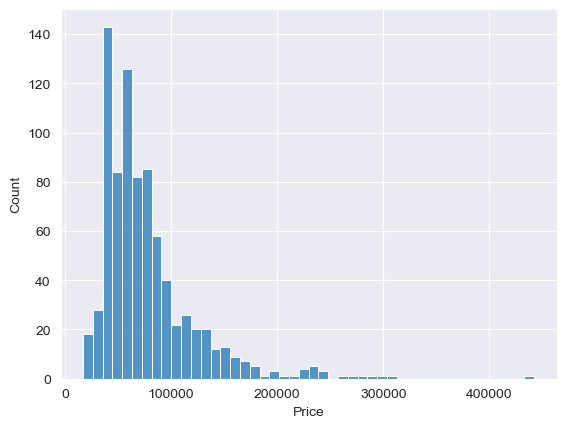

In [13]:
sns.histplot(data=full_df_final, x='Price')

In [14]:
full_df_final: pd.DataFrame = full_df_final.drop(full_df_final[full_df_final['Price'] > 400_000].index)

<Axes: xlabel='Price', ylabel='Count'>

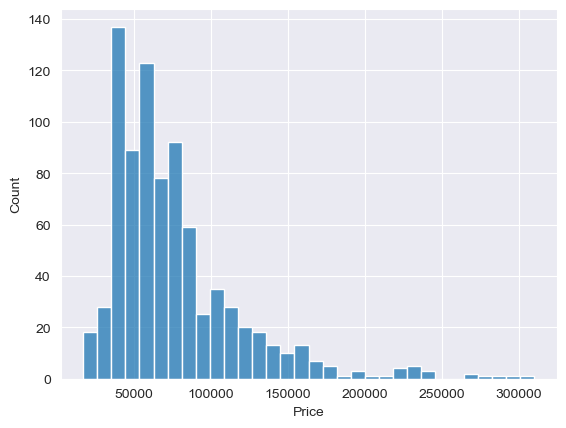

In [15]:
sns.histplot(data=full_df_final, x='Price')

In [16]:
from sklearn.model_selection import train_test_split
RANDOM_SEED: int = 42

In [17]:
X = full_df_final.drop(columns='Price')
y = full_df_final['Price']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_SEED, test_size=0.2)

In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.46388838224241047

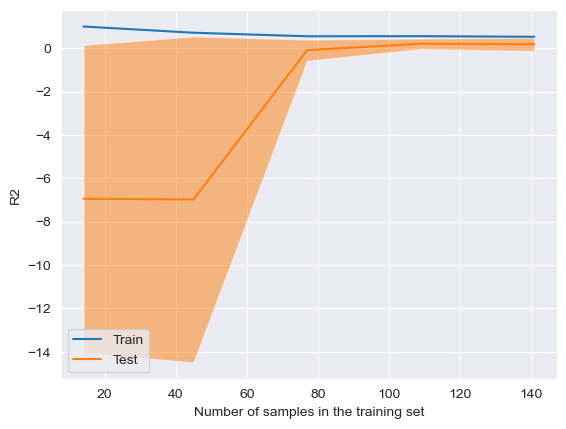

In [39]:
from sklearn.model_selection import LearningCurveDisplay

LearningCurveDisplay.from_estimator(lr, X_test, y_test, cv=7, scoring='r2', n_jobs=-1)

In [51]:
from sklearn.tree import DecisionTreeRegressor

tree: DecisionTreeRegressor = DecisionTreeRegressor(random_state=RANDOM_SEED)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.656701012007087

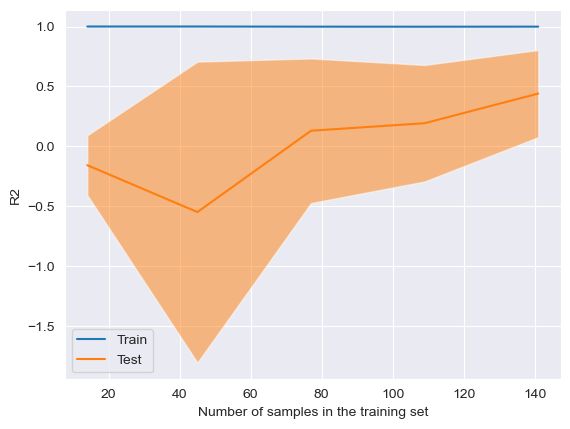

In [54]:
LearningCurveDisplay.from_estimator(tree, X_test, y_test, cv=7, scoring='r2', n_jobs=-1)

In [55]:
from sklearn.ensemble import RandomForestRegressor

RFS: RandomForestRegressor = RandomForestRegressor(n_estimators=10_000, random_state=RANDOM_SEED)

RFS.fit(X_train, y_train)
RFS.score(X_test, y_test)

0.659312544661758

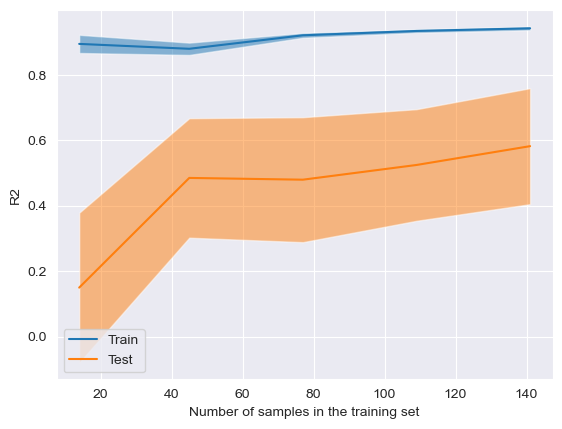

In [56]:
LearningCurveDisplay.from_estimator(RFS, X_test, y_test, cv=7, scoring='r2', n_jobs=-1)